# Fully Connected Neural Network for MNIST dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
train = np.genfromtxt('MNIST_CSV/mnist_train.csv', delimiter=',',dtype='int')
test = np.genfromtxt('MNIST_CSV/mnist_test.csv', delimiter=',',dtype='int')

np.random.shuffle(train); np.random.shuffle(test)

# Version 1

In [339]:
def get_data(data):
    x = data[:,1:].T / 255
    y = data[:,0]
    return x, y

def initialize_weights_and_biases():
    w1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    w2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return w1, b1, w2, b2

def forward(X,w1,b1,w2,b2):
    z1 = w1.dot(X) + b1
    a1 = ReLU(z1)
    z2 = w2.dot(a1) + b2
    a2 = SoftMax(z2)
    return z1, a1, z2, a2

def backward(X,Y,a2,a1,w2,z1,m):
    Y_gt = Y_GT(Y)
    dz2 = a2 - Y_gt
    dw2 = 1/m * dz2.dot(a1.T)
    db2 = 1/m * np.sum(dz2)
    dz1 = w2.T.dot(dz2) * dReLU(z1)
    dw1 = 1/m * dz1.dot(X.T)
    db1 = 1/m * np.sum(dz1)
    return dw2, db2, dw1, db1

def update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,lr):
    w1 = w1 - lr*dw1
    b1 = b1 - lr*db1
    w2 = w2 - lr*dw2
    b2 = b2 - lr*db2
    return w1, b1, w2, b2

def Y_GT(Y):
    Y_gt = np.zeros((Y.size, 10))
    Y_gt[np.arange(Y.size), Y] = 1
    return Y_gt.T

def ReLU(z):
    return np.maximum(0,z)

def dReLU(z):
    return z > 0

def SoftMax(z):
    return np.exp(z) / sum(np.exp(z))

def get_predictions(a2):
    return np.argmax(a2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def predict(X, w1, b1, w2, b2):
    _, _, _, a2 = forward(X,w1,b1,w2,b2)
    predictions = get_predictions(a2)
    return predictions

def show_prediction(data, model):
    w1, b1, w2, b2 = model
    X, Y = get_data(data)
    index = np.random.randint(len(X[0,:]))
    prediction = predict(X[:, index, None], w1, b1, w2, b2)
    label = Y[index]
    print("Prediction: ", prediction, " // Label: ", label)
    im = X[:, index, None].reshape((28, 28)) * 255
    plt.gray(); plt.imshow(im); plt.show()

def train_model(data, lr, epochs, batch = None, pretrained = None, save_period = None):
    
    if not save_period:
        save_period = epochs // 10

    if pretrained:
        w1, b1, w2, b2 = pretrained
    else:
        w1, b1, w2, b2 = initialize_weights_and_biases()

    X_full, Y_full = get_data(data)
    if not batch:
        X = X_full; Y = Y_full
        _, m = X.shape

    for i in range(epochs+1):
        if batch:
            indices = np.random.choice(np.arange(len(train)), size = batch, replace = False)
            X = X_full[:,indices]; Y = Y_full[indices]
            _, m = X.shape
        z1, a1, _, a2 = forward(X,w1,b1,w2,b2)
        dw2, db2, dw1, db1 = backward(X,Y,a2,a1,w2,z1,m)
        w1, b1, w2, b2 = update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,lr)
        if i % save_period == 0:
            print('Epoch: ', i,' // Acuracy = ', get_accuracy(get_predictions(a2), Y))
    weights = w1, b1, w2, b2
    return weights

def test_model(model, data):
    w1,b1,w2,b2 = model; x,y = get_data(data)
    return get_accuracy(predict(x, w1, b1, w2, b2), y)


def save_model(model,name):
    if not name.endswith('.p'):
        name = name + '.p'
    w1,b1,w2,b2 = model; model_dict = {}
    model_dict['w1'] = w1; model_dict['b1'] = b1
    model_dict['w2'] = w2; model_dict['b2'] = b2
    with open(name, 'wb') as f:
        pickle.dump(model_dict, f, protocol=pickle.HIGHEST_PROTOCOL)

def load_model(name):
    if not name.endswith('.p'):
        name = name + '.p'
    try:
        with open(name, 'rb') as f:
            model_dict = pickle.load(f)
        w1 = model_dict['w1']; b1 = model_dict['b1']
        w2 = model_dict['w2']; b2 = model_dict['b2']
        model = w1,b1,w2,b2
        return model
    except:
        raise FileNotFoundError('File not found')

In [340]:
model = train_model(data = train, lr = 0.1, epochs = 10000, batch = 100)
print('Accuracy on test dataset: ',test_model(model=model,data=test))

Epoch:  0  // Acuracy =  0.05
Epoch:  1000  // Acuracy =  0.89
Epoch:  2000  // Acuracy =  0.95
Epoch:  3000  // Acuracy =  0.9
Epoch:  4000  // Acuracy =  0.94
Epoch:  5000  // Acuracy =  0.94
Epoch:  6000  // Acuracy =  0.96
Epoch:  7000  // Acuracy =  0.93
Epoch:  8000  // Acuracy =  0.95
Epoch:  9000  // Acuracy =  0.88
Epoch:  10000  // Acuracy =  0.94
Accuracy on test dataset:  0.9241


In [341]:
save_model(model,'mnist_one_layer.p')

In [ ]:
# load pretrained model
model = load_model('mnist_1_0')

In [140]:
show_prediction(train, model)

# Version 2

In [342]:
def get_data(data):
    x = data[:,1:].T / 255
    y = data[:,0]
    return x, y

def initialize_weights_and_biases():
    w1 = np.random.rand(112,784) - 0.5
    b1 = np.random.rand(112,1) - 0.5
    w2 = np.random.rand(10,112) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    w3 = np.random.rand(10,10) - 0.5
    b3 = np.random.rand(10,1) - 0.5
    return w1, b1, w2, b2, w3, b3

def forward(X,w1,b1,w2,b2,w3,b3):
    z1 = w1.dot(X) + b1
    a1 = ReLU(z1)
    z2 = w2.dot(a1) + b2
    a2 = ReLU(z2)
    z3 = w3.dot(a2) + b3
    a3 = SoftMax(z3)
    return z1, a1, z2, a2, z3, a3

def backward(X,Y,a3,a2,a1,w3,w2,z3,z2,z1,m):
    Y_gt = Y_GT(Y)
    dz3 = a3 - Y_gt
    dw3 = 1/m * dz3.dot(a2.T)
    db3 = 1/m * np.sum(dz3)
    dz2 = w3.T.dot(dz3) * dReLU(z2)
    dw2 = 1/m * dz2.dot(a1.T)
    db2 = 1/m * np.sum(dz2)
    dz1 = w2.T.dot(dz2) * dReLU(z1)
    dw1 = 1/m * dz1.dot(X.T)
    db1 = 1/m * np.sum(dz1)
    return dw3, db3, dw2, db2, dw1, db1

def update_params(w1,b1,w2,b2,w3,b3,dw1,db1,dw2,db2,dw3,db3,lr):
    w1 = w1 - lr*dw1
    b1 = b1 - lr*db1
    w2 = w2 - lr*dw2
    b2 = b2 - lr*db2
    w3 = w3 - lr*dw3
    b3 = b3 - lr*db3
    return w1, b1, w2, b2, w3, b3

def Y_GT(Y):
    Y_gt = np.zeros((Y.size, 10))
    Y_gt[np.arange(Y.size), Y] = 1
    return Y_gt.T
    
def ReLU(z):
    return np.maximum(0,z)

def dReLU(z):
    return z > 0

def SoftMax(z):
    return np.exp(z) / sum(np.exp(z))

def get_predictions(a3):
    return np.argmax(a3, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def predict(X, w1, b1, w2, b2, w3, b3):
    _, _, _, _, _, a3 = forward(X,w1,b1,w2,b2,w3,b3)
    predictions = get_predictions(a3)
    return predictions

def show_prediction(data, model):
    w1, b1, w2, b2, w3, b3 = model
    X, Y = get_data(data)
    index = np.random.randint(len(X[0,:]))
    prediction = predict(X[:, index, None], w1, b1, w2, b2, w3, b3)
    label = Y[index]
    print("Prediction: ", prediction, " // Label: ", label)
    im = X[:, index, None].reshape((28, 28)) * 255
    plt.gray(); plt.imshow(im); plt.show()

def train_model(data, lr, epochs, batch = None, pretrained = None, save_period = None):
    
    if not save_period:
        save_period = epochs // 10

    if pretrained:
        w1, b1, w2, b2, w3, b3 = pretrained
    else:
        w1, b1, w2, b2, w3, b3 = initialize_weights_and_biases()

    X_full, Y_full = get_data(data)
    if not batch:
        X = X_full; Y = Y_full
        _, m = X.shape

    for i in range(epochs+1):
        if batch:
            indices = np.random.choice(np.arange(len(train)), size = batch, replace = False)
            X = X_full[:,indices]; Y = Y_full[indices]
            _, m = X.shape
        z1, a1, z2, a2, z3, a3 = forward(X,w1,b1,w2,b2,w3,b3)
        dw3, db3, dw2, db2, dw1, db1 = backward(X,Y,a3,a2,a1,w3,w2,z3,z2,z1,m)
        w1, b1, w2, b2, w3, b3 = update_params(w1,b1,w2,b2,w3,b3,dw1,db1,dw2,db2,dw3,db3,lr)
        if i % save_period == 0:
            print('Epoch: ', i,' // Acuracy = ', get_accuracy(get_predictions(a3), Y))
    weights = w1, b1, w2, b2, w3, b3
    return weights

def test_model(model, data):
    w1,b1,w2,b2,w3,b3 = model; x,y = get_data(data)
    return get_accuracy(predict(x, w1, b1, w2, b2, w3, b3), y)


def save_model(model,name):
    if not name.endswith('.p'):
        name = name + '.p'
    w1,b1,w2,b2,w3,b3 = model; model_dict = {}
    model_dict['w1'] = w1; model_dict['b1'] = b1
    model_dict['w2'] = w2; model_dict['b2'] = b2
    model_dict['w3'] = w3; model_dict['b3'] = b3
    with open(name, 'wb') as f:
        pickle.dump(model_dict, f, protocol=pickle.HIGHEST_PROTOCOL)

def load_model(name):
    if not name.endswith('.p'):
        name = name + '.p'
    try:
        with open(name, 'rb') as f:
            model_dict = pickle.load(f)
        w1 = model_dict['w1']; b1 = model_dict['b1']
        w2 = model_dict['w2']; b2 = model_dict['b2']
        w3 = model_dict['w3']; b3 = model_dict['b3']
        model = w1,b1,w2,b2,w3,b3
        return model
    except:
        raise FileNotFoundError('File not found')

In [343]:
model = train_model(data = train, lr = 0.1, epochs = 10000,  batch = 100)
print('Accuracy on test dataset: ',test_model(model=model,data=test))

Epoch:  0  // Acuracy =  0.16
Epoch:  1000  // Acuracy =  0.91
Epoch:  2000  // Acuracy =  0.96
Epoch:  3000  // Acuracy =  0.96
Epoch:  4000  // Acuracy =  0.92
Epoch:  5000  // Acuracy =  0.97
Epoch:  6000  // Acuracy =  0.99
Epoch:  7000  // Acuracy =  0.99
Epoch:  8000  // Acuracy =  0.97
Epoch:  9000  // Acuracy =  0.98
Epoch:  10000  // Acuracy =  0.98
Accuracy on test dataset:  0.9599


In [344]:
save_model(model,'mnist_2_layers.p')

# Version 3

In [320]:
def get_data(data):
    x = data[:,1:].T / 255
    y = data[:,0]
    return x, y

def initialize_weights_and_biases():
    w1 = np.random.rand(196,784) - 0.5
    b1 = np.random.rand(196,1) - 0.5
    w2 = np.random.rand(49,196) - 0.5
    b2 = np.random.rand(49,1) - 0.5
    w3 = np.random.rand(10,49) - 0.5
    b3 = np.random.rand(10,1) - 0.5
    w4 = np.random.rand(10,10) - 0.5
    b4 = np.random.rand(10,1) - 0.5
    return w1, b1, w2, b2, w3, b3, w4, b4

def forward(X,w1,b1,w2,b2,w3,b3,w4,b4):
    z1 = w1.dot(X) + b1
    a1 = ReLU(z1)
    z2 = w2.dot(a1) + b2
    a2 = ReLU(z2)
    z3 = w3.dot(a2) + b3
    a3 = ReLU(z3)
    z4 = w4.dot(a3) + b4
    a4 = SoftMax(z4)
    return z1, a1, z2, a2, z3, a3, z4, a4

def backward(X,Y,a4,a3,a2,a1,w4,w3,w2,z4,z3,z2,z1,m):
    Y_gt = Y_GT(Y)
    dz4 = a4 - Y_gt
    dw4 = 1/m * dz4.dot(a3.T)
    db4 = 1/m * np.sum(dz4)
    dz3 = w4.T.dot(dz4) * dReLU(z3)
    dw3 = 1/m * dz3.dot(a2.T)
    db3 = 1/m * np.sum(dz3)
    dz2 = w3.T.dot(dz3) * dReLU(z2)
    dw2 = 1/m * dz2.dot(a1.T)
    db2 = 1/m * np.sum(dz2)
    dz1 = w2.T.dot(dz2) * dReLU(z1)
    dw1 = 1/m * dz1.dot(X.T)
    db1 = 1/m * np.sum(dz1)
    return dw4, db4, dw3, db3, dw2, db2, dw1, db1

def update_params(w1,b1,w2,b2,w3,b3,w4,b4,dw1,db1,dw2,db2,dw3,db3,dw4,db4,lr):
    w1 = w1 - lr*dw1
    b1 = b1 - lr*db1
    w2 = w2 - lr*dw2
    b2 = b2 - lr*db2
    w3 = w3 - lr*dw3
    b3 = b3 - lr*db3
    w4 = w4 - lr*dw4
    b4 = b4 - lr*db4
    return w1, b1, w2, b2, w3, b3, w4, b4

def Y_GT(Y):
    Y_gt = np.zeros((Y.size, 10))
    Y_gt[np.arange(Y.size), Y] = 1
    return Y_gt.T

def ReLU(z):
    return np.maximum(0,z)

def dReLU(z):
    return z > 0

def SoftMax(z):
    return np.exp(z) / sum(np.exp(z))

def get_predictions(a4):
    return np.argmax(a4, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def predict(X, w1, b1, w2, b2, w3, b3, w4, b4):
    _, _, _, _, _, _, _, a4 = forward(X,w1,b1,w2,b2,w3,b3,w4,b4)
    predictions = get_predictions(a4)
    return predictions

def show_prediction(data, model):
    w1, b1, w2, b2, w3, b3, w4, b4 = model
    X, Y = get_data(data)
    index = np.random.randint(len(X[0,:]))
    prediction = predict(X[:, index, None], w1, b1, w2, b2, w3, b3, w4, b4)
    label = Y[index]
    print("Prediction: ", prediction, " // Label: ", label)
    im = X[:, index, None].reshape((28, 28)) * 255
    plt.gray(); plt.imshow(im); plt.show()

def train_model(data, lr, epochs, batch = None, pretrained = None, save_period = None):
    
    if not save_period:
        save_period = epochs // 10

    if pretrained:
        w1, b1, w2, b2, w3, b3, w4, b4 = pretrained
    else:
        w1, b1, w2, b2, w3, b3, w4, b4 = initialize_weights_and_biases()

    X_full, Y_full = get_data(data)
    if not batch:
        X = X_full; Y = Y_full
        _, m = X.shape

    for i in range(epochs+1):
        if batch:
            indices = np.random.choice(np.arange(len(train)), size = batch, replace = False)
            X = X_full[:,indices]; Y = Y_full[indices]
            _, m = X.shape
        z1, a1, z2, a2, z3, a3, z4, a4 = forward(X,w1,b1,w2,b2,w3,b3,w4,b4)
        dw4, db4, dw3, db3, dw2, db2, dw1, db1 = backward(X,Y,a4,a3,a2,a1,w4,w3,w2,z4,z3,z2,z1,m)
        w1, b1, w2, b2, w3, b3, w4, b4 = update_params(w1,b1,w2,b2,w3,b3,w4,b4,dw1,db1,dw2,db2,dw3,db3,dw4,db4,lr)
        if i % save_period == 0:
            print('Epoch: ', i,' // Acuracy = ', get_accuracy(get_predictions(a4), Y))
    weights = w1, b1, w2, b2, w3, b3, w4, b4
    return weights

def test_model(model, data):
    w1,b1,w2,b2,w3,b3,w4,b4 = model; x,y = get_data(data)
    return get_accuracy(predict(x, w1, b1, w2, b2, w3, b3, w4, b4), y)


def save_model(model,name):
    if not name.endswith('.p'):
        name = name + '.p'
    w1,b1,w2,b2,w3,b3,w4,b4 = model; model_dict = {}
    model_dict['w1'] = w1; model_dict['b1'] = b1
    model_dict['w2'] = w2; model_dict['b2'] = b2
    model_dict['w3'] = w3; model_dict['b3'] = b3
    model_dict['w4'] = w4; model_dict['b4'] = b4
    with open(name, 'wb') as f:
        pickle.dump(model_dict, f, protocol=pickle.HIGHEST_PROTOCOL)

def load_model(name):
    if not name.endswith('.p'):
        name = name + '.p'
    try:
        with open(name, 'rb') as f:
            model_dict = pickle.load(f)
        w1 = model_dict['w1']; b1 = model_dict['b1']
        w2 = model_dict['w2']; b2 = model_dict['b2']
        w3 = model_dict['w3']; b3 = model_dict['b3']
        w4 = model_dict['w4']; b4 = model_dict['b4']
        model = w1,b1,w2,b2,w3,b3,w4,b4
        return model
    except:
        raise FileNotFoundError('File not found')

In [322]:
model = train_model(data = train, lr = 0.1, epochs = 10000,  batch = 100, save_period = 1000)
print('Accuracy on test dataset: ',test_model(model=model,data=test))

Epoch:  0  // Acuracy =  0.06
Epoch:  1000  // Acuracy =  0.92
Epoch:  2000  // Acuracy =  0.97
Epoch:  3000  // Acuracy =  0.93
Epoch:  4000  // Acuracy =  0.98
Epoch:  5000  // Acuracy =  0.95
Epoch:  6000  // Acuracy =  0.93
Epoch:  7000  // Acuracy =  0.98
Epoch:  8000  // Acuracy =  0.95
Epoch:  9000  // Acuracy =  0.98
Epoch:  10000  // Acuracy =  0.99
Accuracy on test dataset:  0.9588


In [ ]:
save_model(model,'mnist_3_layers.p')

# Version 4

In [5]:
def get_data(data):
    x = data[:,1:].T / 255
    y = data[:,0]
    return x, y

def initialize_weights_and_biases():
    w1 = np.random.rand(196,784) - 0.5
    b1 = np.random.rand(196,1) - 0.5
    w2 = np.random.rand(49,196) - 0.5
    b2 = np.random.rand(49,1) - 0.5
    w3 = np.random.rand(10,49) - 0.5
    b3 = np.random.rand(10,1) - 0.5
    w4 = np.random.rand(10,10) - 0.5
    b4 = np.random.rand(10,1) - 0.5
    return w1, b1, w2, b2, w3, b3, w4, b4

def forward(X,w1,b1,w2,b2,w3,b3,w4,b4):
    z1 = w1.dot(X) + b1
    a1 = ReLU(z1)
    z2 = w2.dot(a1) + b2
    a2 = ReLU(z2)
    z3 = w3.dot(a2) + b3
    a3 = ReLU(z3)
    z4 = w4.dot(a3) + b4
    a4 = SoftMax(z4)
    return z1, a1, z2, a2, z3, a3, z4, a4

def backward(X,Y,a4,a3,a2,a1,w4,w3,w2,z4,z3,z2,z1,m):
    Y_gt = Y_GT(Y)
    dz4 = a4 - Y_gt
    dw4 = 1/m * dz4.dot(a3.T)
    db4 = 1/m * np.sum(dz4)
    dz3 = w4.T.dot(dz4) * dReLU(z3)
    dw3 = 1/m * dz3.dot(a2.T)
    db3 = 1/m * np.sum(dz3)
    dz2 = w3.T.dot(dz3) * dReLU(z2)
    dw2 = 1/m * dz2.dot(a1.T)
    db2 = 1/m * np.sum(dz2)
    dz1 = w2.T.dot(dz2) * dReLU(z1)
    dw1 = 1/m * dz1.dot(X.T)
    db1 = 1/m * np.sum(dz1)
    return dw4, db4, dw3, db3, dw2, db2, dw1, db1

def update_params(w1,b1,w2,b2,w3,b3,w4,b4,dw1,db1,dw2,db2,dw3,db3,dw4,db4,lr):
    w1 = w1 - lr*dw1
    b1 = b1 - lr*db1
    w2 = w2 - lr*dw2
    b2 = b2 - lr*db2
    w3 = w3 - lr*dw3
    b3 = b3 - lr*db3
    w4 = w4 - lr*dw4
    b4 = b4 - lr*db4
    return w1, b1, w2, b2, w3, b3, w4, b4

def Y_GT(Y):
    Y_gt = np.zeros((Y.size, 10))
    Y_gt[np.arange(Y.size), Y] = 1
    return Y_gt.T

def ReLU(z):
    return np.maximum(0,z)

def dReLU(z):
    return z > 0

def SoftMax(z):
    return np.exp(z) / sum(np.exp(z))

def get_predictions(a4):
    return np.argmax(a4, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def predict(X, w1, b1, w2, b2, w3, b3, w4, b4):
    _, _, _, _, _, _, _, a4 = forward(X,w1,b1,w2,b2,w3,b3,w4,b4)
    predictions = get_predictions(a4)
    return predictions

def show_prediction(data, model):
    w1, b1, w2, b2, w3, b3, w4, b4 = model
    X, Y = get_data(data)
    index = np.random.randint(len(X[0,:]))
    prediction = predict(X[:, index, None], w1, b1, w2, b2, w3, b3, w4, b4)
    label = Y[index]
    print("Prediction: ", prediction, " // Label: ", label)
    im = X[:, index, None].reshape((28, 28)) * 255
    plt.gray(); plt.imshow(im); plt.show()

def train_model(data, lr, epochs, batch = None, pretrained = None, save_period = None):
    
    if not save_period:
        save_period = epochs // 10

    if pretrained:
        w1, b1, w2, b2, w3, b3, w4, b4 = pretrained
        
    else:
        w1, b1, w2, b2, w3, b3, w4, b4 = initialize_weights_and_biases()

    acc_best = test_model(model=(w1,b1,w2,b2,w3,b3,w4,b4),data=test)

    X_full, Y_full = get_data(data)
    if not batch:
        X = X_full; Y = Y_full
        _, m = X.shape

    for i in range(epochs+1):
        if batch:
            indices = np.random.choice(np.arange(len(train)), size = batch, replace = False)
            X = X_full[:,indices]; Y = Y_full[indices]
            _, m = X.shape
        z1, a1, z2, a2, z3, a3, z4, a4 = forward(X,w1,b1,w2,b2,w3,b3,w4,b4)
        dw4, db4, dw3, db3, dw2, db2, dw1, db1 = backward(X,Y,a4,a3,a2,a1,w4,w3,w2,z4,z3,z2,z1,m)
        w1, b1, w2, b2, w3, b3, w4, b4 = update_params(w1,b1,w2,b2,w3,b3,w4,b4,dw1,db1,dw2,db2,dw3,db3,dw4,db4,lr)
        if i % save_period == 0:
            acc_new = test_model(model=(w1,b1,w2,b2,w3,b3,w4,b4),data=test)
            if acc_new > acc_best:
               weights =  w1, b1, w2, b2, w3, b3, w4, b4
               acc_best = acc_new
            print('Epoch: ', i,' // Acuracy = ', acc_new)
    if weights:
        return weights
    else:
        print('Model did not improve')

def test_model(model, data):
    w1,b1,w2,b2,w3,b3,w4,b4 = model; x,y = get_data(data)
    return get_accuracy(predict(x, w1, b1, w2, b2, w3, b3, w4, b4), y)


def save_model(model,name):
    if not name.endswith('.p'):
        name = name + '.p'
    w1,b1,w2,b2,w3,b3,w4,b4 = model; model_dict = {}
    model_dict['w1'] = w1; model_dict['b1'] = b1
    model_dict['w2'] = w2; model_dict['b2'] = b2
    model_dict['w3'] = w3; model_dict['b3'] = b3
    model_dict['w4'] = w4; model_dict['b4'] = b4
    with open(name, 'wb') as f:
        pickle.dump(model_dict, f, protocol=pickle.HIGHEST_PROTOCOL)

def load_model(name):
    if not name.endswith('.p'):
        name = name + '.p'
    try:
        with open(name, 'rb') as f:
            model_dict = pickle.load(f)
        w1 = model_dict['w1']; b1 = model_dict['b1']
        w2 = model_dict['w2']; b2 = model_dict['b2']
        w3 = model_dict['w3']; b3 = model_dict['b3']
        w4 = model_dict['w4']; b4 = model_dict['b4']
        model = w1,b1,w2,b2,w3,b3,w4,b4
        return model
    except:
        raise FileNotFoundError('File not found')

In [366]:
model = train_model(data = train, lr = 0.1, epochs = 10000,  batch = 100, save_period = 100)
print('Accuracy on test dataset: ',test_model(model=model,data=test))

Epoch:  0  // Acuracy =  0.1051
Epoch:  100  // Acuracy =  0.5391
Epoch:  200  // Acuracy =  0.7627
Epoch:  300  // Acuracy =  0.8299
Epoch:  400  // Acuracy =  0.858
Epoch:  500  // Acuracy =  0.8843
Epoch:  600  // Acuracy =  0.8939
Epoch:  700  // Acuracy =  0.9036
Epoch:  800  // Acuracy =  0.9064
Epoch:  900  // Acuracy =  0.9143
Epoch:  1000  // Acuracy =  0.9164
Epoch:  1100  // Acuracy =  0.9201
Epoch:  1200  // Acuracy =  0.9243
Epoch:  1300  // Acuracy =  0.9213
Epoch:  1400  // Acuracy =  0.9237
Epoch:  1500  // Acuracy =  0.9274
Epoch:  1600  // Acuracy =  0.9313
Epoch:  1700  // Acuracy =  0.929
Epoch:  1800  // Acuracy =  0.9343
Epoch:  1900  // Acuracy =  0.9295
Epoch:  2000  // Acuracy =  0.9354
Epoch:  2100  // Acuracy =  0.9357
Epoch:  2200  // Acuracy =  0.9388
Epoch:  2300  // Acuracy =  0.9391
Epoch:  2400  // Acuracy =  0.9418
Epoch:  2500  // Acuracy =  0.9446
Epoch:  2600  // Acuracy =  0.9397
Epoch:  2700  // Acuracy =  0.9414
Epoch:  2800  // Acuracy =  0.939


In [367]:
save_model(model,'mnist_3_layers.p')

In [6]:
model = load_model('mnist_3_layers.p')

Prediction:  [7]  // Label:  7


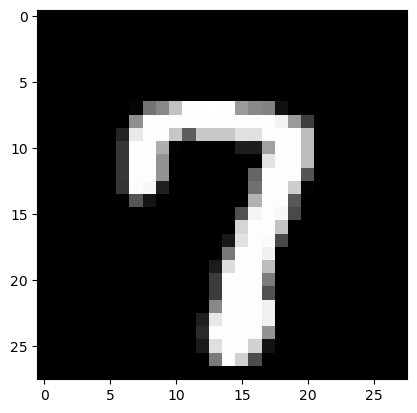

In [34]:
show_prediction(test, model)

# Version 5

In [350]:
def get_data(data):
    x = data[:,1:].T / 255
    y = data[:,0]
    return x, y

def initialize_weights_and_biases():
    w1 = np.random.rand(392,784) - 0.5
    b1 = np.random.rand(392,1) - 0.5
    w2 = np.random.rand(196,392) - 0.5
    b2 = np.random.rand(196,1) - 0.5
    w3 = np.random.rand(49,196) - 0.5
    b3 = np.random.rand(49,1) - 0.5
    w4 = np.random.rand(10,49) - 0.5
    b4 = np.random.rand(10,1) - 0.5
    w5 = np.random.rand(10,10) - 0.5
    b5 = np.random.rand(10,1) - 0.5
    return w1, b1, w2, b2, w3, b3, w4, b4, w5, b5

def forward(X,w1,b1,w2,b2,w3,b3,w4,b4,w5,b5):
    z1 = w1.dot(X) + b1
    a1 = ReLU(z1)
    z2 = w2.dot(a1) + b2
    a2 = ReLU(z2)
    z3 = w3.dot(a2) + b3
    a3 = ReLU(z3)
    z4 = w4.dot(a3) + b4
    a4 = ReLU(z4)
    z5 = w5.dot(a4) + b5
    a5 = SoftMax(z5)
    return z1, a1, z2, a2, z3, a3, z4, a4, z5, a5

def backward(X,Y,a5,a4,a3,a2,a1,w5,w4,w3,w2,z5,z4,z3,z2,z1,m):
    Y_gt = Y_GT(Y)
    dz5 = a5 - Y_gt
    dw5 = 1/m * dz5.dot(a4.T)
    db5 = 1/m * np.sum(dz5)
    dz4 = w5.T.dot(dz5) * dReLU(z4)
    dw4 = 1/m * dz4.dot(a3.T)
    db4 = 1/m * np.sum(dz4)
    dz3 = w4.T.dot(dz4) * dReLU(z3)
    dw3 = 1/m * dz3.dot(a2.T)
    db3 = 1/m * np.sum(dz3)
    dz2 = w3.T.dot(dz3) * dReLU(z2)
    dw2 = 1/m * dz2.dot(a1.T)
    db2 = 1/m * np.sum(dz2)
    dz1 = w2.T.dot(dz2) * dReLU(z1)
    dw1 = 1/m * dz1.dot(X.T)
    db1 = 1/m * np.sum(dz1)
    return dw5, db5, dw4, db4, dw3, db3, dw2, db2, dw1, db1

def update_params(w1,b1,w2,b2,w3,b3,w4,b4,w5,b5,dw1,db1,dw2,db2,dw3,db3,dw4,db4,dw5,db5,lr):
    w1 = w1 - lr*dw1
    b1 = b1 - lr*db1
    w2 = w2 - lr*dw2
    b2 = b2 - lr*db2
    w3 = w3 - lr*dw3
    b3 = b3 - lr*db3
    w4 = w4 - lr*dw4
    b4 = b4 - lr*db4
    w5 = w5 - lr*dw5
    b5 = b5 - lr*db5
    return w1, b1, w2, b2, w3, b3, w4, b4, w5, b5

def Y_GT(Y):
    Y_gt = np.zeros((Y.size, 10))
    Y_gt[np.arange(Y.size), Y] = 1
    return Y_gt.T

def ReLU(z):
    return np.maximum(0,z)

def dReLU(z):
    return z > 0

def SoftMax(z):
    return np.exp(z) / sum(np.exp(z))

def get_predictions(a5):
    return np.argmax(a5, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def predict(X, w1, b1, w2, b2, w3, b3, w4, b4, w5, b5):
    _, _, _, _, _, _, _, _, _, a5 = forward(X,w1,b1,w2,b2,w3,b3,w4,b4,w5,b5)
    predictions = get_predictions(a5)
    return predictions

def show_prediction(data, model):
    w1, b1, w2, b2, w3, b3, w4, b4, w5, b5 = model
    X, Y = get_data(data)
    index = np.random.randint(len(X[0,:]))
    prediction = predict(X[:, index, None], w1, b1, w2, b2, w3, b3, w4, b4, w5, b5)
    label = Y[index]
    print("Prediction: ", prediction, " // Label: ", label)
    im = X[:, index, None].reshape((28, 28)) * 255
    plt.gray(); plt.imshow(im); plt.show()

def train_model(data, lr, epochs, batch = None, pretrained = None, save_period = None):

    if not save_period:
        save_period = epochs // 10

    if pretrained:
        w1, b1, w2, b2, w3, b3, w4, b4, w5, b5 = pretrained
        
    else:
        w1, b1, w2, b2, w3, b3, w4, b4, w5, b5 = initialize_weights_and_biases()

    acc_best = test_model(model=(w1,b1,w2,b2,w3,b3,w4,b4,w5,b5),data=test)

    X_full, Y_full = get_data(data)
    if not batch:
        X = X_full; Y = Y_full
        _, m = X.shape

    for i in range(epochs+1):
        if batch:
            indices = np.random.choice(np.arange(len(train)), size = batch, replace = False)
            X = X_full[:,indices]; Y = Y_full[indices]
            _, m = X.shape
        z1, a1, z2, a2, z3, a3, z4, a4, z5, a5 = forward(X,w1,b1,w2,b2,w3,b3,w4,b4,w5,b5)
        dw5, db5, dw4, db4, dw3, db3, dw2, db2, dw1, db1 = backward(X,Y,a5,a4,a3,a2,a1,w5,w4,w3,w2,z5,z4,z3,z2,z1,m)
        w1,b1,w2,b2,w3,b3,w4,b4,w5,b5 = update_params(w1,b1,w2,b2,w3,b3,w4,b4,w5,b5,dw1,db1,dw2,db2,dw3,db3,dw4,db4,dw5,db5,lr)
        if i % save_period == 0:
            acc_new = test_model(model=(w1,b1,w2,b2,w3,b3,w4,b4,w5,b5),data=test)
            if acc_new > acc_best:
               weights =  w1, b1, w2, b2, w3, b3, w4, b4, w5, b5
               acc_best = acc_new
            print('Epoch: ', i,' // Acuracy = ', acc_new)
    if weights:
        return weights
    else:
        print('Model did not improve')

def test_model(model, data):
    w1,b1,w2,b2,w3,b3,w4,b4,w5,b5 = model; x,y = get_data(data)
    return get_accuracy(predict(x, w1, b1, w2, b2, w3, b3, w4, b4, w5, b5), y)


def save_model(model,name):
    if not name.endswith('.p'):
        name = name + '.p'
    w1,b1,w2,b2,w3,b3,w4,b4,w5,b5 = model; model_dict = {}
    model_dict['w1'] = w1; model_dict['b1'] = b1
    model_dict['w2'] = w2; model_dict['b2'] = b2
    model_dict['w3'] = w3; model_dict['b3'] = b3
    model_dict['w4'] = w4; model_dict['b4'] = b4
    model_dict['w5'] = w5; model_dict['b5'] = b5
    with open(name, 'wb') as f:
        pickle.dump(model_dict, f, protocol=pickle.HIGHEST_PROTOCOL)

def load_model(name):
    if not name.endswith('.p'):
        name = name + '.p'
    try:
        with open(name, 'rb') as f:
            model_dict = pickle.load(f)
        w1 = model_dict['w1']; b1 = model_dict['b1']
        w2 = model_dict['w2']; b2 = model_dict['b2']
        w3 = model_dict['w3']; b3 = model_dict['b3']
        w4 = model_dict['w4']; b4 = model_dict['b4']
        w5 = model_dict['w5']; b5 = model_dict['b5']
        model = w1,b1,w2,b2,w3,b3,w4,b4,w5,b5
        return model
    except:
        raise FileNotFoundError('File not found')

In [ ]:
model = train_model(data = train, lr = 0.001, epochs = 10000, batch = 100, save_period = 100, pretrained = model)
print('Accuracy on test dataset: ',test_model(model=model,data=test))